In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
sns.set_palette("deep")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIT/3.1/ML/Bengaluru_House_Data.csv')

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


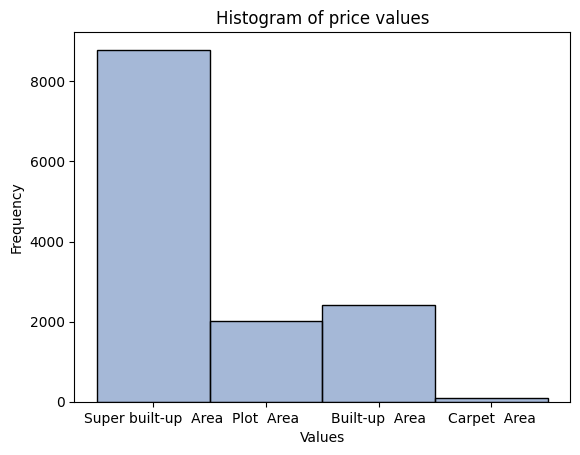

In [ ]:
sns.histplot(data=df, x='area_type', alpha=0.5, label='Price')
#sns.histplot(data=df, x='column2', alpha=0.5, label='Column 2')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of price values')
plt.show()

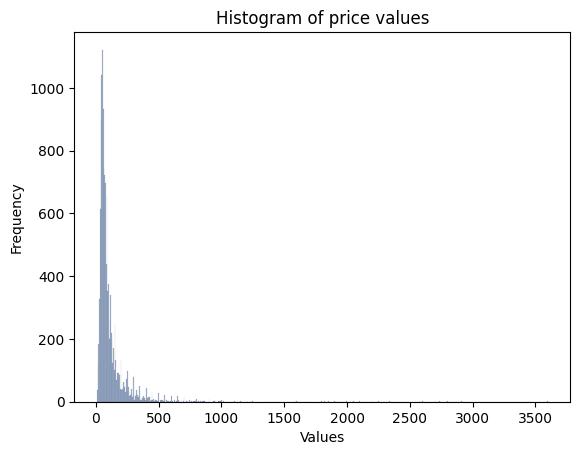

In [ ]:
sns.histplot(data=df, x='price', alpha=0.5, label='Price')
#sns.histplot(data=df, x='column2', alpha=0.5, label='Column 2')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of price values')
plt.show()

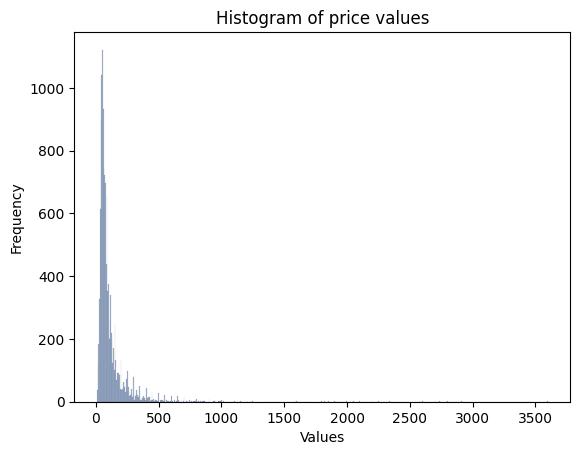

In [ ]:
sns.histplot(data=df, x='price', alpha=0.5, label='Price')
#sns.histplot(data=df, x='column2', alpha=0.5, label='Column 2')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of price values')
plt.show()

In [ ]:
null_counts = df.isna().sum()
null_counts

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

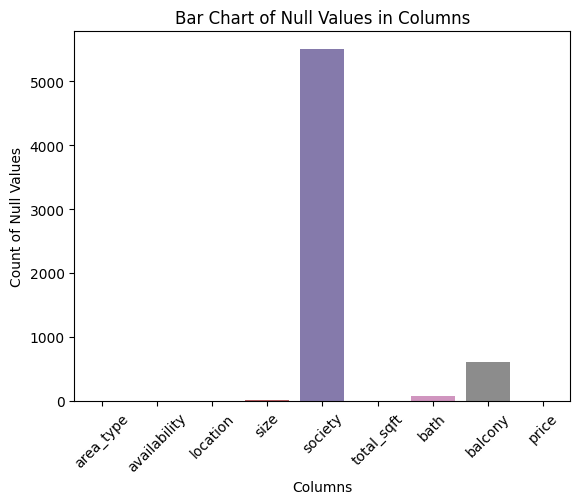

In [ ]:
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Bar Chart of Null Values in Columns')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check the number of unique catogories in each column

print('Number of unique values in each column')
print()

print('area_type: ', df['area_type'].nunique())
print('availability: ', df['availability'].nunique())
print('location: ' , df['location'].nunique())
print('size: ' , df['size'].nunique())
print('society: ' , df['society'].nunique())
print('total_sqft: ', df['total_sqft'].nunique())
print('bath: ', df['bath'].nunique())
print('balcony: ', df['balcony'].nunique())

Number of unique values in each column

area_type:  4
availability:  81
location:  1305
size:  31
society:  2688
total_sqft:  2117
bath:  19
balcony:  4


In [ ]:
# Check the unique value catogories

print('Unique_area_types_values: ', df['area_type'].unique())
print()

print('Unique_availability_values: ', df['availability'].unique())
print()

print('Unique_location_values: ', df['location'].unique())
print()

print('Unique_size_values: ', df['size'].unique())
print()

print('Unique_society_values: ', df['society'].unique())
print()

print('Unique_total_sqft_values: ', df['total_sqft'].unique())
print()

print('Unique_bath_values: ', df['bath'].unique())
print()

print('Unique_balcony_values: ', df['balcony'].unique())

Unique_area_types_values:  ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']

Unique_availability_values:  ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']

Unique_location_values:  ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross sriniva

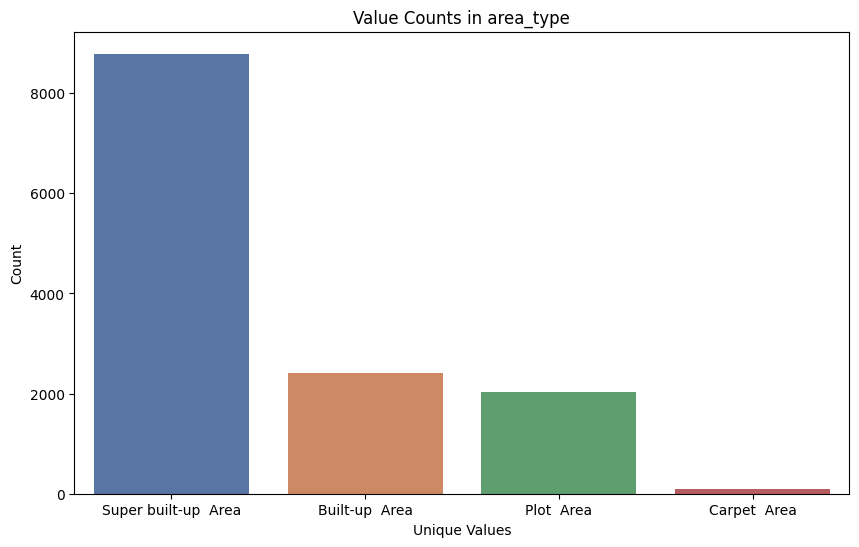

In [ ]:
value_counts = df['area_type'].value_counts()

plt.figure(figsize=(10, 6))  # Optional: adjust the figure size
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Value Counts in area_type')
plt.show()

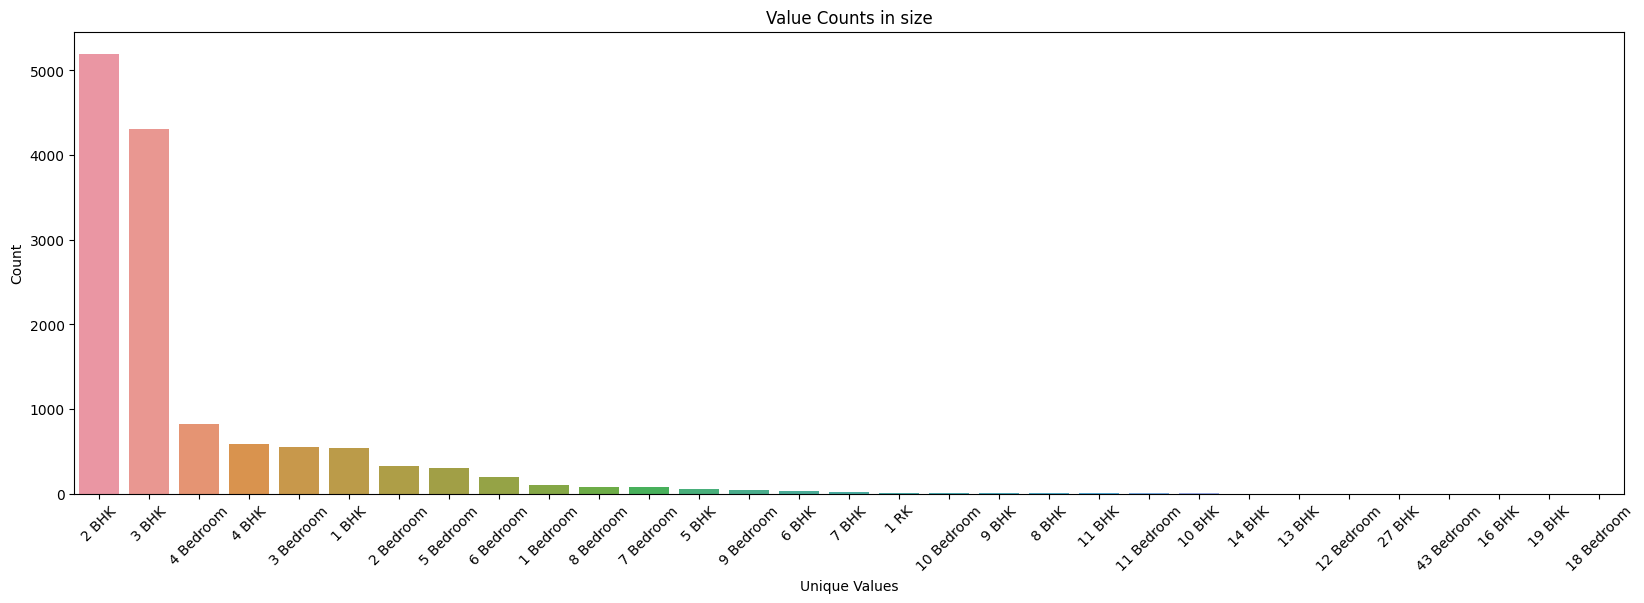

In [ ]:
value_counts = df['size'].value_counts()

plt.figure(figsize=(20, 6))  # Optional: adjust the figure size
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Value Counts in size')
plt.xticks(rotation=45)
plt.show()

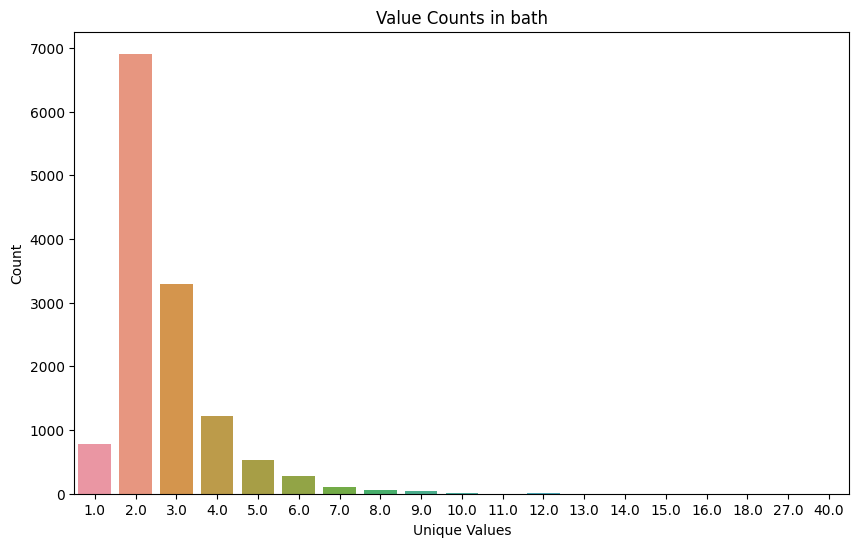

In [ ]:
value_counts = df['bath'].value_counts()

plt.figure(figsize=(10, 6))  # Optional: adjust the figure size
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Value Counts in bath')
plt.show()

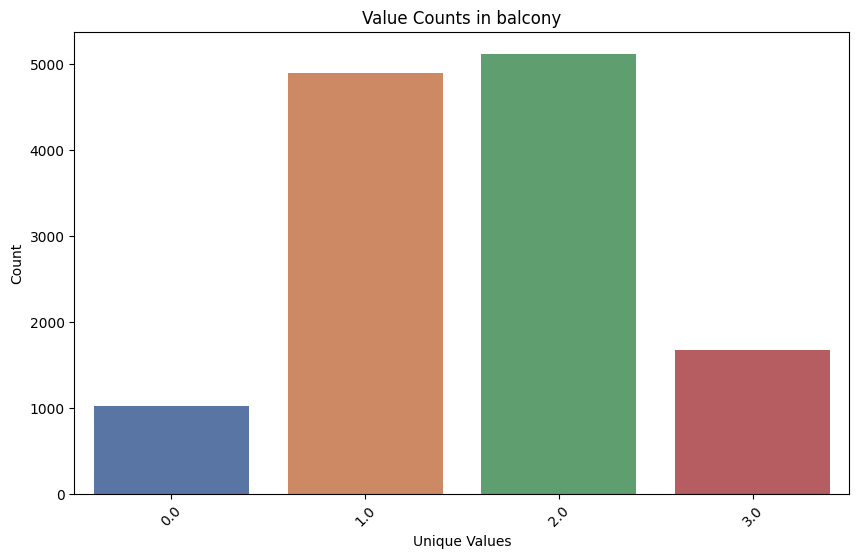

In [ ]:
value_counts = df['balcony'].value_counts()

plt.figure(figsize=(10, 6))  # Optional: adjust the figure size
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Value Counts in balcony')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Fill missing values
df.fillna({'location':df['location'].mode()[0], 
           'size': df['size'].mode()[0], 
           'society': 'Unknown', 
           'bath': df['bath'].mode()[0], 
           'balcony': df['balcony'].mode()[0],}, 
          inplace=True)


In [ ]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
# Transform availibility column date values to 'not ready to move'

df.loc[df['availability'] != 'Ready To Move', 'availability'] = 'Not ready To Move'


In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Not ready To Move,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200,2.0,1.0,51.00


In [ ]:
# Convert total_sqft colomn data type to to numerical and assign non numerical values to null

df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   society       13320 non-null  object 
 5   total_sqft    13073 non-null  float64
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [ ]:
df['total_sqft'].isna().sum()

247

In [ ]:
# Drop new null values from 'total_sqft' column

df = df.dropna(subset=['total_sqft'])

In [ ]:
df['total_sqft'].isna().sum()

0

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Not ready To Move,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Unknown,3600.0,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,Not ready To Move,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [ ]:
# Transforming Ordinal columns ('area_type', 'availibility') data types with label encoding

mapping = {'Plot  Area': 1, 'Carpet  Area': 2, 'Built-up  Area': 3, 'Super built-up  Area': 4}
df['area_type'] = df['area_type'].map(mapping)

<ipython-input-31-d15ed1974462>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_type'] = df['area_type'].map(mapping)


In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,Not ready To Move,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,3,Ready To Move,Uttarahalli,3 BHK,Unknown,1440.0,2.0,3.0,62.00
3,4,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,4,Ready To Move,Kothanur,2 BHK,Unknown,1200.0,2.0,1.0,51.00


In [ ]:
mapping = {'Not ready To Move': 0, 'Ready To Move': 1}
df['availability'] = df['availability'].map(mapping)

<ipython-input-33-8afce5282619>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['availability'] = df['availability'].map(mapping)


In [ ]:
df.head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,0,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,1,1,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,3,1,Uttarahalli,3 BHK,Unknown,1440.0,2.0,3.0,62.00
3,4,1,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,4,1,Kothanur,2 BHK,Unknown,1200.0,2.0,1.0,51.00
5,4,1,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
6,4,0,Old Airport Road,4 BHK,Jaades,2732.0,4.0,2.0,204.00
7,4,1,Rajaji Nagar,4 BHK,Brway G,3300.0,4.0,2.0,600.00
8,4,1,Marathahalli,3 BHK,Unknown,1310.0,3.0,1.0,63.25
9,1,1,Gandhi Bazar,6 Bedroom,Unknown,1020.0,6.0,2.0,370.00


In [ ]:
df2 = df.copy()

In [ ]:
# Strip integer part form size column and store the integer value as a new column called bhk

df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
# Drop size column

df3 = df2.drop(['size'], axis=1)

In [ ]:
df3

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,4,0,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,1,1,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,3,1,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,3
3,4,1,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,4,1,Kothanur,Unknown,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,3,1,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5
13316,4,1,Richards Town,Unknown,3600.0,5.0,2.0,400.00,4
13317,3,1,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2
13318,4,0,Padmanabhanagar,SollyCl,4689.0,4.0,1.0,488.00,4


In [ ]:
# Find the number of records for each unique value in location column

location_value_counts = df3['location'].value_counts()
print(location_value_counts)

Whitefield                   519
Sarjapur  Road               387
Electronic City              302
Kanakpura Road               264
Thanisandra                  222
                            ... 
Rajanna Layout                 1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Sir M V Nagar                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64


In [ ]:
# Find locations with less than 10 records

location_value_counts_less_than_10 = location_value_counts[location_value_counts <= 10]
print(location_value_counts_less_than_10)

Ganga Nagar                  10
Nagadevanahalli              10
Nagappa Reddy Layout         10
ITPL                         10
BTM 1st Stage                10
                             ..
Rajanna Layout                1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Sir M V Nagar                 1
Abshot Layout                 1
Name: location, Length: 1059, dtype: int64


In [ ]:
# Change location type to 'other' for all the locations with less than 10 value count

df3.location = df3.location.apply(lambda x : "other" if x in location_value_counts_less_than_10 else x)

In [ ]:
df3['location'].value_counts()

other                        2894
Whitefield                    519
Sarjapur  Road                387
Electronic City               302
Kanakpura Road                264
                             ... 
Marsur                         11
LB Shastri Nagar               11
Pattandur Agrahara             11
Bommenahalli                   11
2nd Phase Judicial Layout      11
Name: location, Length: 240, dtype: int64

In [ ]:
society_value_counts = df3['society'].value_counts()
print(society_value_counts)

Unknown    5472
GrrvaGr      80
PrarePa      71
Sryalan      59
GMown E      56
           ... 
Diensso       1
Heatee        1
Nihtsur       1
CharkGr       1
RSntsAp       1
Name: society, Length: 2642, dtype: int64


In [ ]:
society_value_counts_less_than_10 = society_value_counts[society_value_counts <= 10]
print(society_value_counts_less_than_10)

PrityFa    10
Prldsri    10
Soeurri    10
SoitaCa    10
SuVue S    10
           ..
Diensso     1
Heatee      1
Nihtsur     1
CharkGr     1
RSntsAp     1
Name: society, Length: 2519, dtype: int64


In [ ]:
df3.society = df3.society.apply(lambda x : "other" if x in society_value_counts_less_than_10 else x)

In [ ]:
df3['society'].value_counts()

Unknown    5472
other      5003
GrrvaGr      80
PrarePa      71
Sryalan      59
           ... 
Peide L      11
Pronyt       11
SPavenc      11
Itvir M      11
SrncyRe      11
Name: society, Length: 124, dtype: int64

In [ ]:
df3.shape

(13073, 9)

In [ ]:
# One hot encode location and society columns

df4 = pd.get_dummies(df3, columns = ['location', 'society'])
df4

,area_type,availability,total_sqft,bath,balcony,price,bhk,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,...,society_Sryalan,society_SunceEs,society_Taonte,society_Tavenew,society_Theanmp,society_UKe 2nz,society_Unknown,society_Unm 2El,society_ViistLa,society_other
0,4,0,1056.0,2.0,1.0,39.07,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,2600.0,5.0,3.0,120.00,4,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,1440.0,2.0,3.0,62.00,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1521.0,3.0,1.0,95.00,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1200.0,2.0,1.0,51.00,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3,1,3453.0,4.0,0.0,231.00,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13316,4,1,3600.0,5.0,2.0,400.00,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13317,3,1,1141.0,2.0,1.0,60.00,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13318,4,0,4689.0,4.0,1.0,488.00,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df4.shape

(13073, 371)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13073 entries, 0 to 13319
Columns: 371 entries, area_type to society_other
dtypes: float64(4), int64(3), uint8(364)
memory usage: 5.3 MB


In [ ]:
df5 =df4.astype(float)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13073 entries, 0 to 13319
Columns: 371 entries, area_type to society_other
dtypes: float64(371)
memory usage: 37.1 MB


In [ ]:
def find_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   iqr=q3-q1
   fence_low  = q1-1.5*iqr
   fence_high = q3+1.5*iqr
   outliers = df[((df<(fence_low)) | (df>(fence_high)))]
   return outliers

<Axes: >

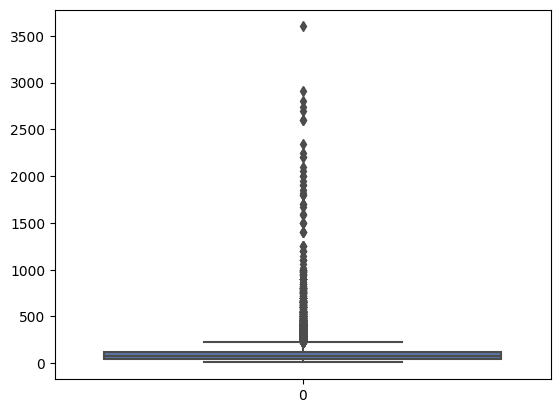

In [ ]:
sns.boxplot(df5['price'])

<Axes: >

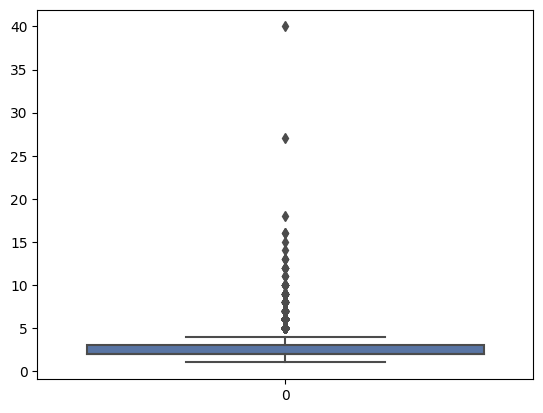

In [ ]:
sns.boxplot(df5['bath'])

<Axes: >

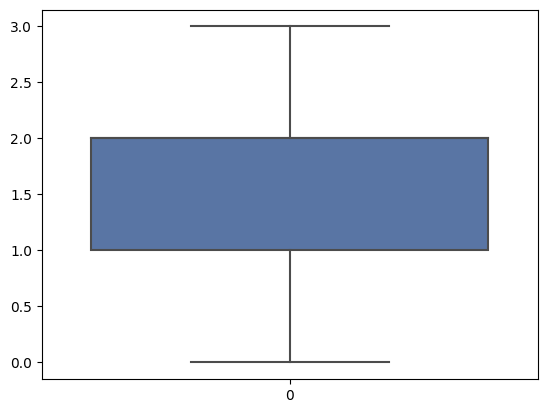

In [ ]:
sns.boxplot(df5['balcony'])

<Axes: >

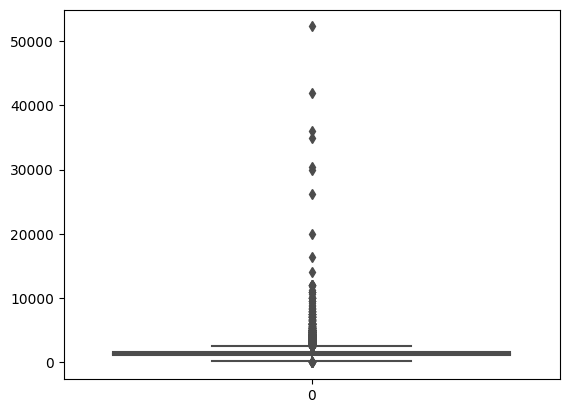

In [ ]:
sns.boxplot(df5['total_sqft'])

<Axes: >

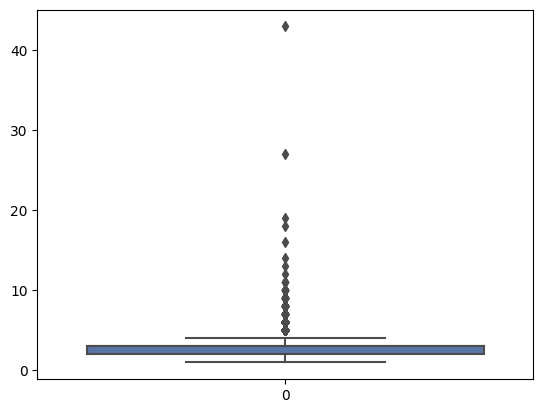

In [ ]:
sns.boxplot(df5['bhk'])

In [ ]:
# Find outliers in price column

outliers = find_outliers(df5['price'])
print(outliers)
print()
print('Number of outliers: ', len(outliers))
print('Max_outlier: ', str(outliers.max()))
print('Min outlier: ', str(outliers.min()))

7        600.0
9        370.0
11       295.0
18       290.0
22       380.0
         ...  
13306    325.0
13311    250.0
13315    231.0
13316    400.0
13318    488.0
Name: price, Length: 1240, dtype: float64

Number of outliers:  1240
Max_outlier:  3600.0
Min outlier:  226.0


In [ ]:
# Remove outliers in price column

df5 = df5[df5.price.isin(outliers) == False]

In [ ]:
df5.head()

,area_type,availability,total_sqft,bath,balcony,price,bhk,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,...,society_Sryalan,society_SunceEs,society_Taonte,society_Tavenew,society_Theanmp,society_UKe 2nz,society_Unknown,society_Unm 2El,society_ViistLa,society_other
0,4.0,0.0,1056.0,2.0,1.0,39.07,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,2600.0,5.0,3.0,120.00,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,1440.0,2.0,3.0,62.00,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,1.0,1521.0,3.0,1.0,95.00,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1.0,1200.0,2.0,1.0,51.00,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
outliers = find_outliers(df5['total_sqft'])
print(outliers)
print()
print('Number of outliers: ', len(outliers))
print('Max_outlier: ', str(outliers.max()))
print('Min outlier: ', str(outliers.min()))

1        2600.0
6        2732.0
64       3000.0
77       2511.0
85       3000.0
          ...  
13216     250.0
13226    6000.0
13229    2395.0
13268    3360.0
13293    2425.0
Name: total_sqft, Length: 678, dtype: float64

Number of outliers:  678
Max_outlier:  52272.0
Min outlier:  1.0


In [ ]:
df5 = df5[df5.total_sqft.isin(outliers) == False]

In [ ]:
outliers = find_outliers(df5['bath'])
print(outliers)
print()
print('Number of outliers: ', len(outliers))
print('Max_outlier: ', str(outliers.max()))
print('Min outlier: ', str(outliers.min()))

45       9.0
68       7.0
84       5.0
89       6.0
129      7.0
        ... 
13277    7.0
13279    5.0
13281    5.0
13300    6.0
13303    5.0
Name: bath, Length: 333, dtype: float64

Number of outliers:  333
Max_outlier:  18.0
Min outlier:  5.0


In [ ]:
df5 = df5[df5.bath.isin(outliers) == False]

In [ ]:
outliers = find_outliers(df5['balcony'])
print(outliers)
print()
print('Number of outliers: ', len(outliers))
print('Max_outlier: ', str(outliers.max()))
print('Min outlier: ', str(outliers.min()))

Series([], Name: balcony, dtype: float64)

Number of outliers:  0
Max_outlier:  nan
Min outlier:  nan


In [ ]:
df5 = df5[df5.balcony.isin(outliers) == False]

In [ ]:
df6_columns = ['total_sqft', 'bath', 'balcony', 'bhk', 'price']
df6 = df5[df6_columns]
df6

,total_sqft,bath,balcony,bhk,price
0,1056.0,2.0,1.0,2.0,39.07
2,1440.0,2.0,3.0,3.0,62.00
3,1521.0,3.0,1.0,3.0,95.00
4,1200.0,2.0,1.0,2.0,51.00
5,1170.0,2.0,1.0,2.0,38.00
...,...,...,...,...,...
13312,1262.0,2.0,2.0,2.0,47.00
13313,1345.0,2.0,1.0,3.0,57.00
13314,1715.0,3.0,3.0,3.0,112.00
13317,1141.0,2.0,1.0,2.0,60.00


In [ ]:
X = df6.drop('price', axis=1)
y = df6['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
mlr = LinearRegression()

In [ ]:
mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_test = mlr.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_test)

0.4641855281064584

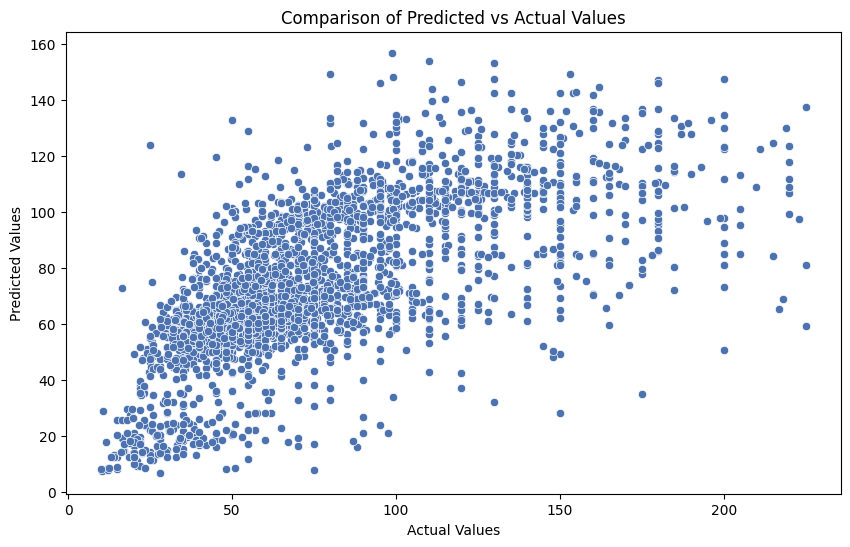

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted vs Actual Values')
plt.show()

In [ ]:
X = df5.drop('price', axis=1)
y = df5['price']

In [ ]:
# Add a constant column to X to estimate the intercept term in the linear regression model.
X = sm.add_constant(X)


# Creates the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X)

# Fits the OLS model to the data, estimating the coefficients and other statistical properties of the model.
results = model.fit()

# Get the correlation, p-values, and t-values
correlation = results.rsquared
p_values = results.pvalues[1:]  # The [1:] indexing is used to exclude the constant term, as it is not associated with a specific independent variable.
t_values = results.tvalues[1:] 

print("Correlation:", correlation)
print("P-values:", p_values)
print("T-values:", t_values)

Correlation: 0.45865531147981076
P-values: total_sqft     0.000000e+00
bath          1.742127e-100
balcony        1.213308e-36
bhk            1.424664e-20
dtype: float64
T-values: total_sqft    47.939596
bath          21.505100
balcony      -12.690777
bhk            9.317309
dtype: float64


In [ ]:
# Set the threshold values for p-values and t-values
p_threshold = 0.05
t_threshold = 1.96

# Select the best features based on p-values and t-values
selected_features = []
for i in range(len(p_values)):
    if p_values[i] < p_threshold and abs(t_values[i]) > t_threshold:
        selected_features.append(X.columns[i+1])  # Add 1 to skip the constant term

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['area_type', 'availability', 'total_sqft', 'bath', 'balcony', 'bhk', 'location_1st Block Jayanagar', 'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi', 'location_6th Phase JP Nagar', 'location_8th Phase JP Nagar', 'location_9th Phase JP Nagar', 'location_Ambalipura', 'location_Anandapura', 'location_Ananth Nagar', 'location_Anekal', 'location_Anjanapura', 'location_Attibele', 'location_BTM 2nd Stage', 'location_Babusapalaya', 'location_Banashankari Stage II', 'location_Banashankari Stage III', 'location_Banashankari Stage V', 'location_Banashankari Stage VI', 'location_Bannerghatta Road', 'location_Basavangudi', 'location_Basaveshwara Nagar', 'location_Begur', 'location_Begur Road', 'location_Benson Town', 'location_Binny Pete', 'location_Bommanahalli', 'location_Bommasandra', 'location_Bommasandra Industrial Area', 'location_Chamrajpet', 'location_Chandapura', 'location_Channasandra', 'location_Chikka Tirupathi', '

In [ ]:
# Creates a X dataframe with only selected features

X = X.filter(selected_features)

In [ ]:
# Split the dataset to training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Create a multiple linear regression model

mlr = LinearRegression()

In [ ]:
# Fit the model

mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Find the intercept

intercept = mlr.intercept_
intercept

27.743511800196224

In [ ]:
# Find coefficients for features

coefficients = mlr.coef_
coefficients

In [ ]:
# Predict training data values

y_pred_train = mlr.predict(X_train)
y_pred_train

array([102.24044046,  69.26876409,  99.82265342, ...,  98.28652065,
        76.83248969,  70.7684416 ])

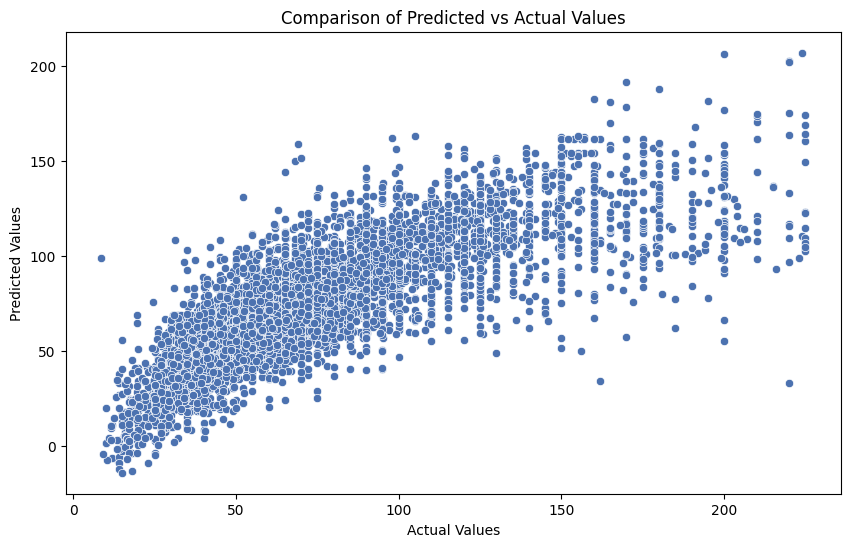

In [ ]:
# Compare training data predicted values against actual values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted vs Actual Values')
plt.show()

In [ ]:
# Find R squared value

r2_score(y_train, y_pred_train)

0.6521875057357118

In [ ]:
# Predict test data values

y_pred_test = mlr.predict(X_test)
y_pred_test

array([ 99.3800402 ,  67.00720319,  72.2439982 , ...,  28.32862584,
       121.16456174,  50.01771392])

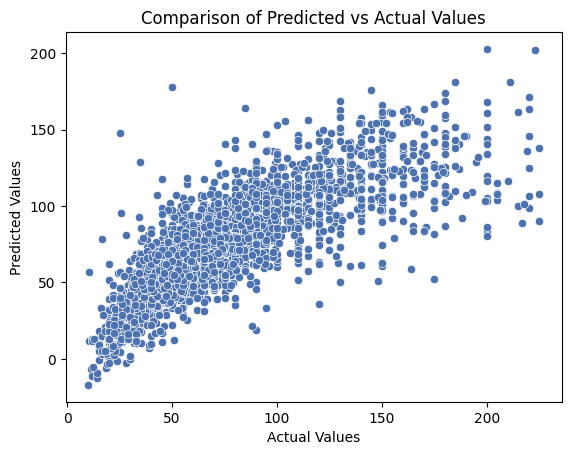

In [ ]:
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted vs Actual Values')
plt.show()

In [ ]:
r2_score(y_test, y_pred_test)

0.63894535106479

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create and fit decision tree model

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_train = dt.predict(X_train)
y_pred_train

array([105.        ,  60.66666667,  93.        , ..., 112.        ,
        90.        ,  46.08      ])

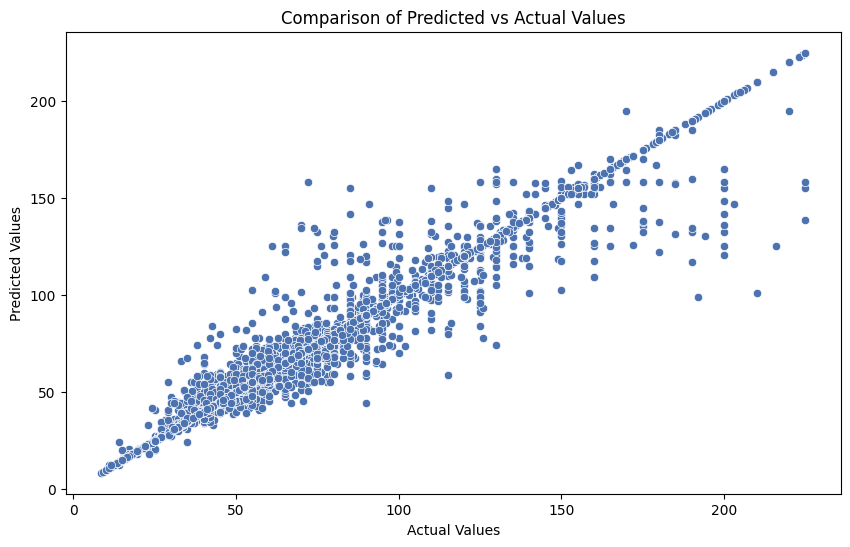

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted vs Actual Values')
plt.show()

In [ ]:
r2_score(y_train, y_pred_train)

0.9618133274430821

In [ ]:
y_pred_test = dt.predict(X_test)
y_pred_test

array([ 82.  ,  62.  ,  52.75, ...,  54.  , 102.  ,  62.5 ])

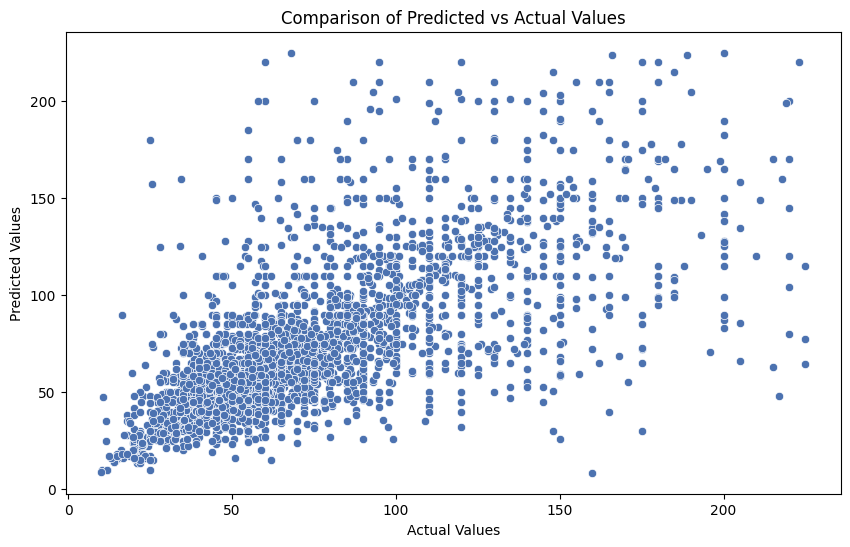

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted vs Actual Values')
plt.show()

In [ ]:
r2_score(y_test, y_pred_test)

0.4138826244356457

In [ ]:
df5.head()

,area_type,availability,total_sqft,bath,balcony,price,bhk,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,...,society_Sryalan,society_SunceEs,society_Taonte,society_Tavenew,society_Theanmp,society_UKe 2nz,society_Unknown,society_Unm 2El,society_ViistLa,society_other
0,4.0,0.0,1056.0,2.0,1.0,39.07,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.0,1.0,1440.0,2.0,3.0,62.00,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,1.0,1521.0,3.0,1.0,95.00,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1.0,1200.0,2.0,1.0,51.00,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,4.0,1.0,1170.0,2.0,1.0,38.00,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 13319
Columns: 371 entries, area_type to society_other
dtypes: float64(371)
memory usage: 30.7 MB
